### **Import Dependancies**

In [522]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

### **Load Data**

In [523]:
wine_data = pd.read_csv('/content/winequality-red.csv')

In [524]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### **Pre-Processing Data**

In [525]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [526]:
#I think Everything is alright here.
wine_data.shape

(1599, 12)

In [527]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### **Data Visulizarion**

In [528]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: xlabel='quality', ylabel='count'>

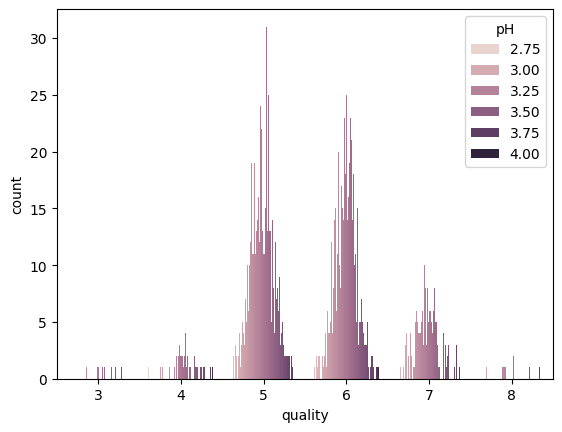

In [529]:
sns.countplot(x='quality', hue = 'pH',data = wine_data)

<Axes: xlabel='quality'>

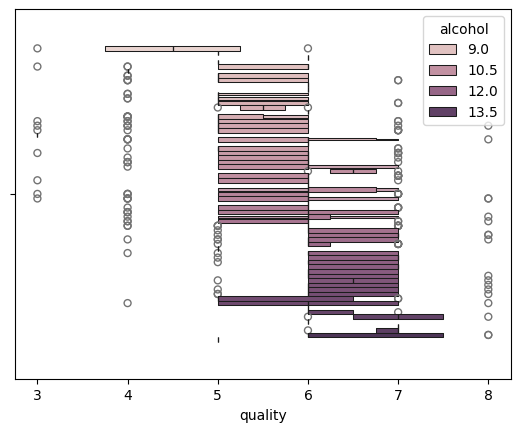

In [530]:
sns.boxenplot(x = 'quality', hue='alcohol', data = wine_data)

<Axes: xlabel='citric acid'>

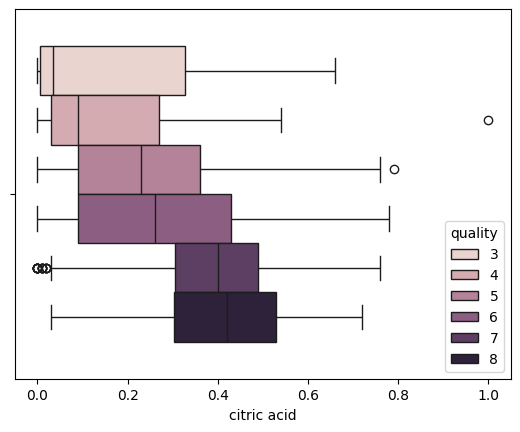

In [531]:
sns.boxplot(x = 'citric acid', hue='quality', data = wine_data)

<Axes: xlabel='density', ylabel='quality'>

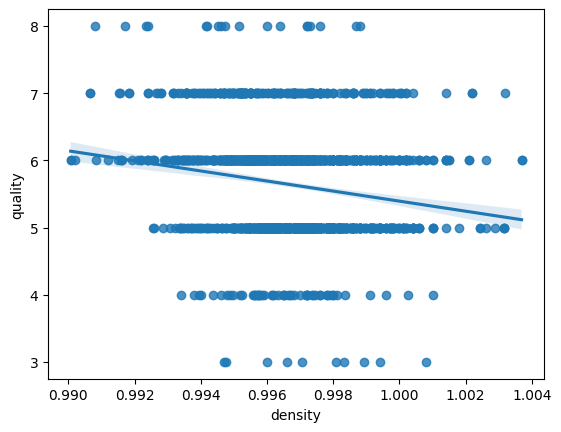

In [532]:
sns.regplot(x = 'density', y = 'quality', data = wine_data)

### **Splitting Data for Input and output**

In [533]:
# Input
x = wine_data.drop(columns = 'quality', axis =1)
x.shape

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [534]:
y = wine_data['quality']
y.shape

(1599,)

### **Splitting data for training and testing**

In [535]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.1, random_state=42, shuffle= True)

In [536]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1439, 11) (1439,) (160, 11) (160,)


### **Choosing Model**

In [537]:
svm_model = svm.LinearSVC()
svm_model.fit(x_train, y_train)

LinearSVC()

In [538]:
rf = RandomForestClassifier(
    # n_estimators=50,       # number of trees
    max_depth=10,             # limit tree depth
    min_samples_split=20,    # minimum samples to split a node
    # min_samples_leaf=2,      # minimum samples in leaf node
    random_state=42
    )
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=20, random_state=42)

In [539]:
dt = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=5,
    random_state=42
)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

In [540]:
lr = LogisticRegression(solver='liblinear',
    max_iter=500,
    random_state=6)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=500, random_state=6, solver='liblinear')

#### **Evaluate SVC**

In [541]:
# train prediction
svm_y_train_pred = svm_model.predict(x_train)
svm_y_train_acc = accuracy_score(y_train, svm_y_train_pred)
print(svm_y_train_acc)

0.5879082696316886


In [542]:
#Test Prediction
svm_y_test_pred = svm_model.predict(x_test)
svm_y_test_acc = accuracy_score(y_test, svm_y_test_pred)
print(svm_y_test_acc)

0.59375


#### **Evaluate RF**

In [543]:
rf_y_train_pred = rf.predict(x_train)
rf_y_train_acc = accuracy_score(y_train, rf_y_train_pred)
print(rf_y_train_acc)

0.8116747741487144


In [544]:
rf_y_test_pred = rf.predict(x_test)
rf_y_test_acc = accuracy_score(y_test, rf_y_test_pred)
print(rf_y_test_acc)

0.625


#### **Evaluate DT**

In [545]:
dt_y_train_pred = dt.predict(x_train)
dt_y_train_acc = accuracy_score(y_train, dt_y_train_pred)
print(dt_y_train_acc)

0.6386379430159833


In [546]:
dt_y_test_pred = dt.predict(x_test)
dt_y_test_acc = accuracy_score(y_test, dt_y_test_pred)
print(dt_y_test_acc)

0.5375


#### **Evaluate LC**

In [547]:
lr_y_train_pred = dt.predict(x_train)
lr_y_train_acc = accuracy_score(y_train, lr_y_train_pred)
print(lr_y_train_acc)

0.6386379430159833


In [548]:
lr_y_test_pred = dt.predict(x_test)
lr_y_test_acc = accuracy_score(y_test, lr_y_test_pred)
print(dt_y_test_acc)

0.5375


In [549]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [550]:
#finding average train pred, average test pred
import pandas as pd
pd.DataFrame({
    'SVM': [svm_y_train_acc, svm_y_test_acc],
    'RF': [rf_y_train_acc, rf_y_test_acc],
    'DT': [dt_y_train_acc, dt_y_test_acc],
    'LR': [lr_y_train_acc, lr_y_test_acc]
}, index=['Train', 'Test'])


,SVM,RF,DT,LR
Train,0.587908,0.811675,0.638638,0.638638
Test,0.593750,0.625000,0.537500,0.537500


### **Taking Random Forest as higher accurate model**

In [552]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [557]:
input_data = (9.0,0.35,0.45,2.0,0.068,22.0,53.0,0.9970,3.30,0.70,10.8)
input_data_arr = np.asarray(input_data)
input_data_reshaped = input_data_arr.reshape(1,-1)
prediction = rf.predict(input_data_reshaped)
if(prediction[0] >= 6):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

Bad Quality Wine
